In [1]:
%load_ext autotime

time: 139 µs (started: 2023-07-24 16:51:49 +02:00)


In [2]:
import warnings
warnings.filterwarnings('ignore')

time: 239 µs (started: 2023-07-24 16:51:49 +02:00)


In [3]:
import json
# from mei import Size_Distribution_Optics
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import glob
import dask.dataframe as dd

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score 

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Activation

from tensorflow.keras.callbacks import ModelCheckpoint, TerminateOnNaN, ReduceLROnPlateau, EarlyStopping

2023-07-24 16:51:52.385120: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 16:51:52.881393: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-24 16:51:52.881423: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-24 16:51:54.852588: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

time: 7.76 s (started: 2023-07-24 16:51:49 +02:00)


In [4]:
# from kerastuner.tuners import RandomSearch
from net import create_model, normalize, normalize1

time: 26.2 ms (started: 2023-07-24 16:51:57 +02:00)


In [5]:
columns = ['Extinction', 'Scattering', 'SSA', 'Asym', 'coating', 'core_dia', 'n_core', 'k_core', 'n_shell', 'k_shell', 'density', 'lambda']
df = pd.read_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mie_all.csv', index_col=0).sort_index()
df = df[columns].dropna().astype('float').drop_duplicates()
df['x'] = np.pi * df['core_dia'] / df['lambda']
df

,Extinction,Scattering,SSA,Asym,coating,core_dia,n_core,k_core,n_shell,k_shell,density,lambda,x
0,0.072795,0.002253,0.030951,0.019297,0.0,10.0,1.48600,0.106100,1.464000,2.630000e-07,2.6,100.0,0.314159
2,0.034139,0.000141,0.004118,0.004843,0.0,10.0,1.48600,0.106100,1.396000,1.100000e-07,2.6,200.0,0.157080
8,0.007768,0.000024,0.003152,0.002135,0.0,10.0,1.46300,0.035900,1.349000,1.600000e-08,2.6,300.0,0.104720
11,0.003332,0.000005,0.001404,0.000946,0.0,10.0,1.45504,0.023075,1.336727,1.353750e-09,2.6,450.0,0.069813
11,0.003332,0.000005,0.001404,0.000946,0.0,10.0,1.45504,0.023075,1.336727,1.353750e-09,2.6,450.0,0.069813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44527776,0.844114,0.108977,0.129103,0.083386,0.4,10000.0,1.61350,0.648098,2.017500,7.225000e-01,1.7,75000.0,0.418879
44527837,1.117326,0.202738,0.181449,0.117843,0.4,11000.0,1.61350,0.648098,2.015000,7.250000e-01,1.7,70000.0,0.493679
44527839,0.886265,0.122657,0.138398,0.089080,0.4,11000.0,1.61350,0.648098,2.020000,7.200000e-01,1.7,80000.0,0.431969
44527902,0.819451,0.106342,0.129773,0.083984,0.4,12000.0,1.61350,0.648098,2.020000,6.850000e-01,1.7,90000.0,0.418879


time: 52 s (started: 2023-07-24 16:51:57 +02:00)


In [6]:
df1 = df[df.x <= 0.5]

mx = df1.max()
mn = df1.min()

pd.concat([pd.DataFrame(mx), pd.DataFrame(mn)], axis=1).to_csv('/work/bb1070/b382177/mie/icon/24-07-2023/mlp_min_max_x1.csv')

df1

,Extinction,Scattering,SSA,Asym,coating,core_dia,n_core,k_core,n_shell,k_shell,density,lambda,x
0,0.072795,0.002253,0.030951,0.019297,0.0,10.0,1.48600,0.106100,1.464000,2.630000e-07,2.6,100.0,0.314159
2,0.034139,0.000141,0.004118,0.004843,0.0,10.0,1.48600,0.106100,1.396000,1.100000e-07,2.6,200.0,0.157080
8,0.007768,0.000024,0.003152,0.002135,0.0,10.0,1.46300,0.035900,1.349000,1.600000e-08,2.6,300.0,0.104720
11,0.003332,0.000005,0.001404,0.000946,0.0,10.0,1.45504,0.023075,1.336727,1.353750e-09,2.6,450.0,0.069813
11,0.003332,0.000005,0.001404,0.000946,0.0,10.0,1.45504,0.023075,1.336727,1.353750e-09,2.6,450.0,0.069813
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44527776,0.844114,0.108977,0.129103,0.083386,0.4,10000.0,1.61350,0.648098,2.017500,7.225000e-01,1.7,75000.0,0.418879
44527837,1.117326,0.202738,0.181449,0.117843,0.4,11000.0,1.61350,0.648098,2.015000,7.250000e-01,1.7,70000.0,0.493679
44527839,0.886265,0.122657,0.138398,0.089080,0.4,11000.0,1.61350,0.648098,2.020000,7.200000e-01,1.7,80000.0,0.431969
44527902,0.819451,0.106342,0.129773,0.083984,0.4,12000.0,1.61350,0.648098,2.020000,6.850000e-01,1.7,90000.0,0.418879


time: 1.03 s (started: 2023-07-24 16:52:49 +02:00)


In [7]:
df_shuffled = df1.sample(frac=1, random_state=25).reset_index(drop=True)
df_shuffled = normalize1(df_shuffled)

out_col = ["Extinction", "Scattering", "Asym"]
in_col = ['coating', 'x', 'n_core', 'k_core', 'n_shell', 'k_shell']

y = df_shuffled[out_col]
x = df_shuffled[in_col]

split = 0.8
train_size = int(split * len(x))
train_x = x.iloc[:train_size, :].reset_index(drop=True)
train_y = y.iloc[:train_size, :].reset_index(drop=True)
test_x = x.iloc[train_size:, :].reset_index(drop=True)
test_y = y.iloc[train_size:, :].reset_index(drop=True)
train_y

,Extinction,Scattering,Asym
0,0.000985,4.804669e-07,0.001390
1,0.010004,1.511571e-02,0.235466
2,0.007343,5.153546e-06,0.005008
3,0.008859,7.119190e-07,0.001371
4,0.006145,3.678805e-04,0.034010
...,...,...,...
3323685,0.100276,6.947009e-03,0.092239
3323686,0.011105,9.013835e-08,0.000346
3323687,0.002645,3.198423e-04,0.033000
3323688,0.006881,7.575481e-04,0.048339


time: 1.12 s (started: 2023-07-24 16:52:50 +02:00)


In [8]:
opt = keras.optimizers.Adam(learning_rate=0.01)
model = create_model(
    6,
    3,
    # hidden=[15, 30, 60, 30, 15],
    hidden=[16, 32, 16],
    dropout=[0.05, 0.05, 0.05, 0],
    # activation=["relu", "tanh", "tanh", "tanh"],
    activation=["gelu", "gelu", "gelu", 'gelu', 'gelu'],
    # activation=["relu", "relu", "relu", 'relu'],
    loss="mse",
    optimizer=opt,
    metrics=['mse', 'mae', 'mape']
)

mc = ModelCheckpoint('model/model_24-07-2023_x1.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True, save_weights_only=False)
es = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=20)
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
tnan = TerminateOnNaN()
callbacks = [es, mc, tnan, rlr]

h = model.fit(
    train_x,
    train_y,
    epochs=100,
    batch_size=500,
    verbose=0,
    validation_split=0.2,
    callbacks=callbacks,
    shuffle=True
)

pred_y = model.predict(test_x)
pred_y = pd.DataFrame(pred_y, columns=out_col)

Input shape: (6,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 16)                112       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 batch_normalization (BatchN  (None, 16)               64        
 ormalization)                                                   
                                                                 
 hidden_layer_2 (Dense)      (None, 32)                544       
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                      

2023-07-24 16:52:51.676115: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-07-24 16:52:51.676150: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-07-24 16:52:51.676169: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (l40007.lvt.dkrz.de): /proc/driver/nvidia/version does not exist
2023-07-24 16:52:51.677664: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.



Epoch 1: val_loss improved from inf to 0.00032, saving model to model/model_24-07-2023_x1.h5

Epoch 2: val_loss improved from 0.00032 to 0.00010, saving model to model/model_24-07-2023_x1.h5

Epoch 3: val_loss improved from 0.00010 to 0.00009, saving model to model/model_24-07-2023_x1.h5

Epoch 4: val_loss did not improve from 0.00009

Epoch 5: val_loss improved from 0.00009 to 0.00009, saving model to model/model_24-07-2023_x1.h5

Epoch 6: val_loss did not improve from 0.00009

Epoch 7: val_loss did not improve from 0.00009

Epoch 8: val_loss did not improve from 0.00009

Epoch 9: val_loss did not improve from 0.00009

Epoch 10: val_loss did not improve from 0.00009

Epoch 11: val_loss did not improve from 0.00009

Epoch 12: val_loss did not improve from 0.00009

Epoch 13: val_loss did not improve from 0.00009

Epoch 14: val_loss did not improve from 0.00009

Epoch 15: val_loss did not improve from 0.00009

Epoch 16: val_loss did not improve from 0.00009

Epoch 17: val_loss did not i

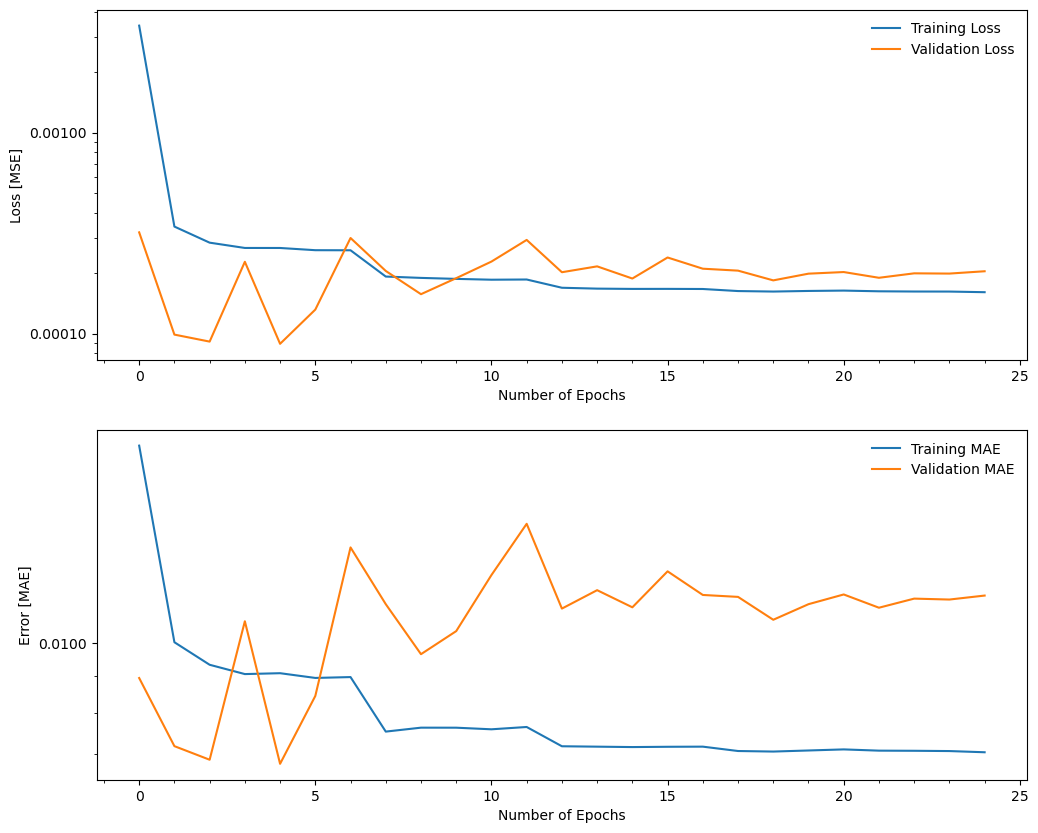

time: 779 ms (started: 2023-07-24 16:57:48 +02:00)


In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.plot(h.history["loss"], label="Training Loss")
ax1.plot(h.history["val_loss"], label="Validation Loss")
ax1.semilogy()

ax2.plot(h.history['mae'], label="Training MAE")
ax2.plot(h.history["val_mae"], label="Validation MAE")

ax1.set_ylabel("Loss [MSE]")
ax2.set_ylabel("Error [MAE]")

for ax in [ax1, ax2]:
    ax.minorticks_on()
    ax.semilogy()
    ax.legend(frameon=False)
    ax.set_xlabel("Number of Epochs")
    # ax.set_yticks([0.01, 0.05, 0.1, 0.5])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.savefig("/work/bb1070/b382177/mie/icon/24-07-2023/figs/opt_epochs_x1.png", bbox_inches="tight")
plt.show()

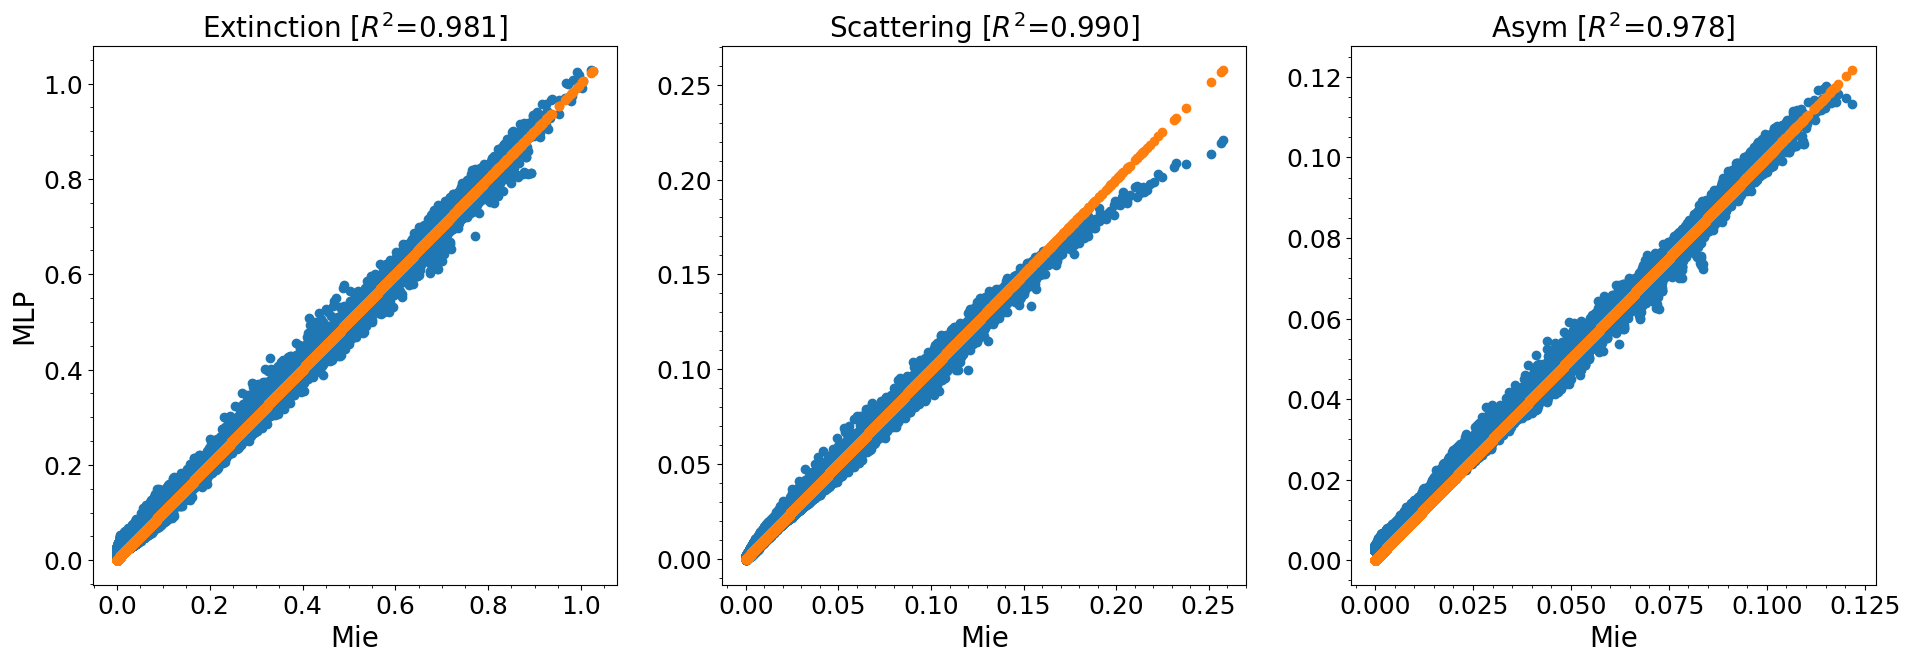

time: 23.8 s (started: 2023-07-24 16:57:49 +02:00)


In [10]:
fig, axes = plt.subplots(1, 3, figsize=(23, 7))
for col, ax in zip(y.columns, axes):
    ntest = test_y[col]
    npred = pred_y[col]
        
    corr = np.corrcoef(ntest, npred)[0,1]
    r2 = r2_score(ntest, npred)
    
    x1 = test_y[col]
    y1 = pred_y[col]    

    x1 = (mx[col] - mn[col]) * x1 + mn[col]
    y1 = (mx[col] - mn[col]) * y1 + mn[col]
        
    ax.scatter(x1, y1)
    ax.scatter(x1, x1)
    ax.set_title('%s [$R^2$=%0.3f]'%(col, r2), fontsize=20)
    ax.set_xlabel('Mie', fontsize=20)
    ax.minorticks_on()
    ax.tick_params(labelsize=18)
axes[0].set_ylabel('MLP', fontsize=20)
plt.savefig("/work/bb1070/b382177/mie/icon/24-07-2023/figs/mlp_accuracy_stats_x1.png", bbox_inches="tight")
plt.show()    

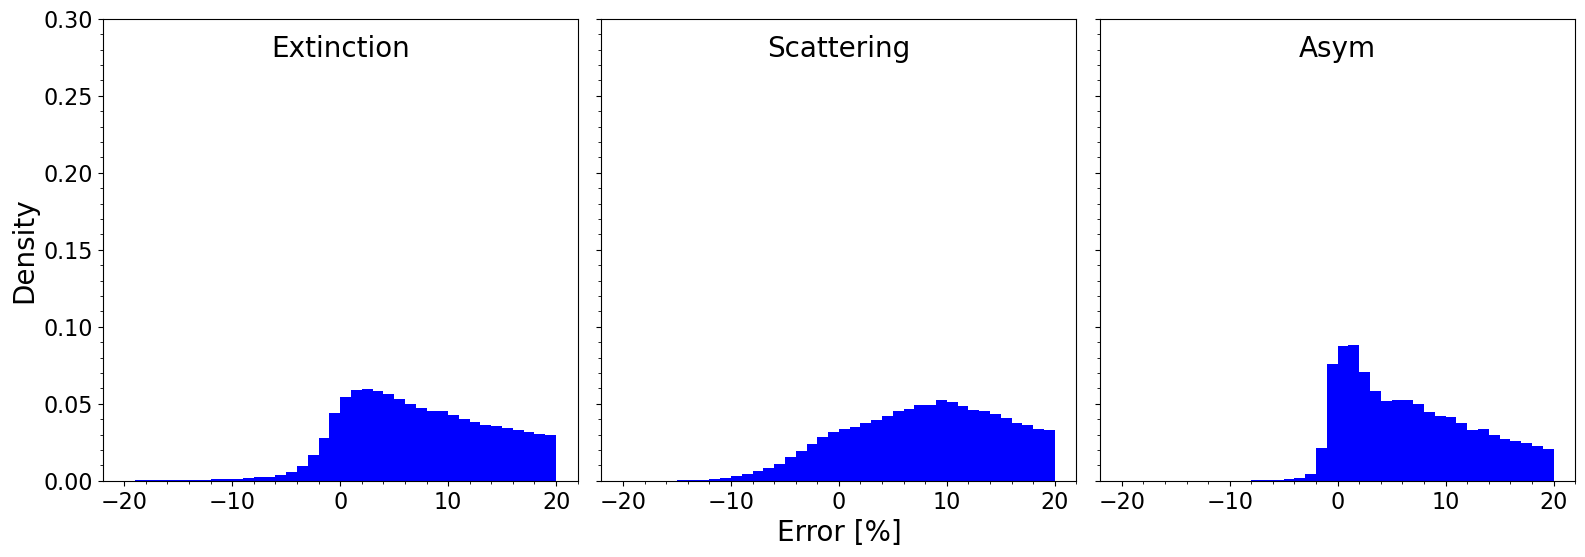

time: 1.24 s (started: 2023-07-24 16:58:12 +02:00)


In [11]:
fig, axes = plt.subplots(1, 3, figsize=(19, 6), sharey=True)
axes = axes.flatten()
for i, (col, ax) in enumerate(zip(y.columns, axes)):
    ntest = test_y[col]
    npred = pred_y[col]  
    
    x1 = test_y[col]
    y1 = pred_y[col]  
    
    x1 = (mx[col] - mn[col]) * x1 + mn[col]
    y1 = (mx[col] - mn[col]) * y1 + mn[col]
    
    corr = np.corrcoef(x1, y1)[0,1]    
    error = 100 * (y1 - x1) / x1   
    
    ax.hist(error, bins=np.arange(-20, 21, 1), density=True, color='blue')
    # ax.hist(error, bins=100, density=True)
    
    # ax.set_title('%s [R=%0.3f]'%(col, corr), fontsize=20)
    ax.set_title('%s'%(col), fontsize=20, y=0.9)
    ax.set_xlabel('Error [%]', fontsize=20)
    ax.set_ylabel('Density', fontsize=20)
    if i!=0:
        ax.set_ylabel('', fontsize=20)
        
    if i!=1:
        ax.set_xlabel('', fontsize=20)
        
    ax.minorticks_on()
    ax.set_yticks(np.arange(0, 0.33, 0.05))
    ax.tick_params(labelsize=16)
    
plt.subplots_adjust(hspace=0.01, wspace=0.05)
plt.savefig('/work/bb1070/b382177/mie/icon/24-07-2023/figs/mlp_error_ana_x1.png', bbox_inches='tight')
plt.show()

In [12]:
model.save('/work/bb1070/b382177/mie/icon/24-07-2023/model/model_24_07_2023_x1.h5')

time: 32.9 ms (started: 2023-07-24 16:58:14 +02:00)


In [13]:
lmodel = tf.keras.models.load_model('/work/bb1070/b382177/mie/icon/24-07-2023/model/model_24_07_2023_x1.h5')

time: 127 ms (started: 2023-07-24 16:58:14 +02:00)
